#***Benchmarking Augmentations***



Augmentations are important for increasing robustness and introducing variation into the training data. By adding augmentations into training, models become more robust to variations in real world data.

Augmentations allows for data expansion. By introducing variation into existing datasets, the size of the training dataset can be increased without having the need to collect and organise more labelled samples.

Additionally, discipline specific variations can act as a form of regularization by preventing the model to overfit to the training data. By also training on a diverse set of augmentations, the model also becomes more capable of recognising patterns in novel situations.

#***Preface***




For Project Echo, the following augmentations has been researched and identified for testing and evaluation into the pipleine. The following document exists as a template for benchmarking these augmentations.



> Author: Balram Veeragoo Naidu

> Credits: Rahul Prem for ii.a) Augmentation Demo...

> Credits: Andrew Kudilczak, for "optimised_engine_pipeline.ipynb"









---

#***List of Augmentations and why are they chosen?***

***i) Image Augmentations***

> **a) Gaudy Images (Mel Spectrogram)**

> Figure 1: The figure shows a non-augmented Mel Spectrogram on the left with its corresponding contrast adjusted augmentation on its right. (see below)

> A study by the Princeton Neuroscience Institute, on understanding sensory transformations of the visual system found that - A simple manipulation of natural images substantially reduces the number of training images needed while also leading to “performances on par with or greater than those achieved by images chosen during training by active learning algorithms”.

> In this study they identified that, “The success of gaudy images comes from their high training errors and from their overemphasis of high-contrast edges.” For verification, when these edges were smoothened (i.e. the contrast of the edges decreased) performance was also decreased.

> It is to note however, that this paper was trained on somewhat small DNN (1.4million parameters) and yet to be tested on larger DNNs (> 10 million parameters).

> In the context of project Echo, increasing the “Gaudiness” of Mel Spectrograms demonstrates a similar effect by overemphasizing the high-contrast edges. Subsequently, this may lead to better model performance.

> **b) Brightness Masking and Inversion (Mel Spectrogram)**

> Figure 2: The figure shows a non-augmented Mel Spectrogram on the left with its corresponding brightness masked augmentation on its right. (see below)

> In brightness masking, we set a threshold for brightness using the Pillow library selecting for the brightness pixels in the image. A mask is then created from this threshold and applied onto the original Mel Spectrogram image. This selects the brightest parts of the Mel Spectrogram and essentially discards the lower points of energy in the original spectrogram image.

> In the context of Project Echo, not only does this produce a transformation from the original audio generated Mel Spectrograms, but this method also helps with removing noise by discarding information carrying the lower points of energy in the spectrogram.

> This method works on the assumption that noise will be reflected in the lower points of energy in the Mel Spectrogram (in a good/clean audio recording).

> Additionally, this threshold is adjustable to account for different energy levels of noise and can be tested further from field recordings to determine if there is an optimal threshold for all audio files.

> In the example above (figure 2), a threshold of 40, was applied to the Mel Spectrogram.

> Subsequently, this process can be inversed using the same Pillow Library to produce an augmented image that further emphasizes the edges in the spectrogram (figure 3).

> Figure 3: The figure shows a non-augmented Mel Spectrogram on the left with its corresponding brightness masked and inverted augmentation on its right. (see below)

> **c) Frequency and Time Masking (Mel Spectrogram)**

> Figure 4: The figure shows examples of frequency masked and time masked augmentations side by side. (see below)

> A study investigating Mel Spectrogram augmentations for sequence-to-sequence voice conversions found that, “the main problem with voice conversion is the lack of data consisting of speech pairs containing the same utterance”. To overcome this situation, they introduced and implemented data augmentation approaches and policies based on audio processing; Based on these augmentations, they set the goal for their paper to be a determinant on the effectiveness for the Seq2Seq VC model.

> However, the effectiveness of their augmentation policies does not directly influence Project Echo’s, model as the task of their model was vastly different from that of Project Echo’s. Their model aimed to successfully preserve linguistic content of the utterance and masking techniques removes information from the source.

> Where this paper may serve useful in in Project Echo’s Context, is that it outlines several augmentation techniques that can be performed on Mel Spectrograms. By implementing and utilizing these techniques during training we can provide our model with a diverse set of examples of our training data, helping to mitigate bias and improve regularization.

> **d) General Transformations (Mel Spectrogram)**

> These transformations makes use of tensorflows built in tf.image module.

> Contrast can also be adjusted here instead of using pillow library to create gaudy images.

> https://www.tensorflow.org/api_docs/python/tf/image

> **e) Other image augmentation techniques (Mel Spectrogram)**

> From, https://arxiv.org/pdf/2001.01401.pdf, axis warping (frequency and time warping).

**ii) Audio Augmentations**

> **a) General Augmentations**

> Audiomentations is a useful library for augmentations as it can be incorporated into Tensorflow's training pipeline.

> Some particularly uselful augmentations include, Gaussian Noise, Time Stretching, Pitch Shifting and Time Shifting.

> Gaussian Noise can help the model generalize to real world scenarios when noise is present.

> Time Stretching can help the model become invariant to small changes in the speed of the audio.

> Pitch shifting can help the model become invariant to variations in pitch that may occur in real world scenarios.

> Time Shifting, can help the model become invariant to the position of important features in the audio.

> **b) Frequency and Time Masking**

> The Frequency and Time Masking here is no different than the frequency masking as explained in the image augmentation section. The difference is in the library being used.

> In this instance, we will be using the audiomentations library, particulary the SpecFrequency Mask Functionality for frequency masking and the TimeMask functionality for time masking.

> Audiomentation's documentation, also supports the research conducted in the image augmentation section on frequency masking in regards to how this technique can make models more robust.

> **c) Spectral Bandwidth and Centroid (Log Power Spectrogram)**

> Figure 5: The spectral bandwidth of an audio file with the spectral centroid overlayed in the middle as a white line. (see below)

> Unlike the previous augmentations, the Spectral bandwidth and Spectral centroid of an audio file is calculated using a Magnitude Spectrogram rather than a Mel Spectrogram. This is due to the linear scale that these measures are calculated on.

> The Spectral Centroid, “is the location of the centre of mass of the spectrum”. It measures the central tendency of the signal which is extremely useful in reducing the influence of noise.

> The Spectral Bandwidth, “is the difference between the upper and lower frequencies in a continuous band of frequencies”. This can help provide a characterization of the signal. (Theoretically), it is not as effective as removing noise from an audio signal as it captures the largest deviation of the signal at each time frame.

> For eg, if we have a clean signal which is oscillating at 700Hz, 750Hz and 800Hz, the Spectral Bandwidth is calculated by subtracting the maximum deviation of the signal at both sides;

> 800Hz – 700Hz = 100Hz

> If we now introduce noise/unwanted signal oscillating at 200Hz into this clean signal. The Spectral Bandwidth will now be:

> 800Hz – 200Hz = 500Hz; characterizing the noise into the bandwidth.

> Given this shortcoming, the Spectral Bandwidth can still however, be a useful feature for extraction if an audio preprocessing step is used ahead of this processing.

***Appendix - Figures***

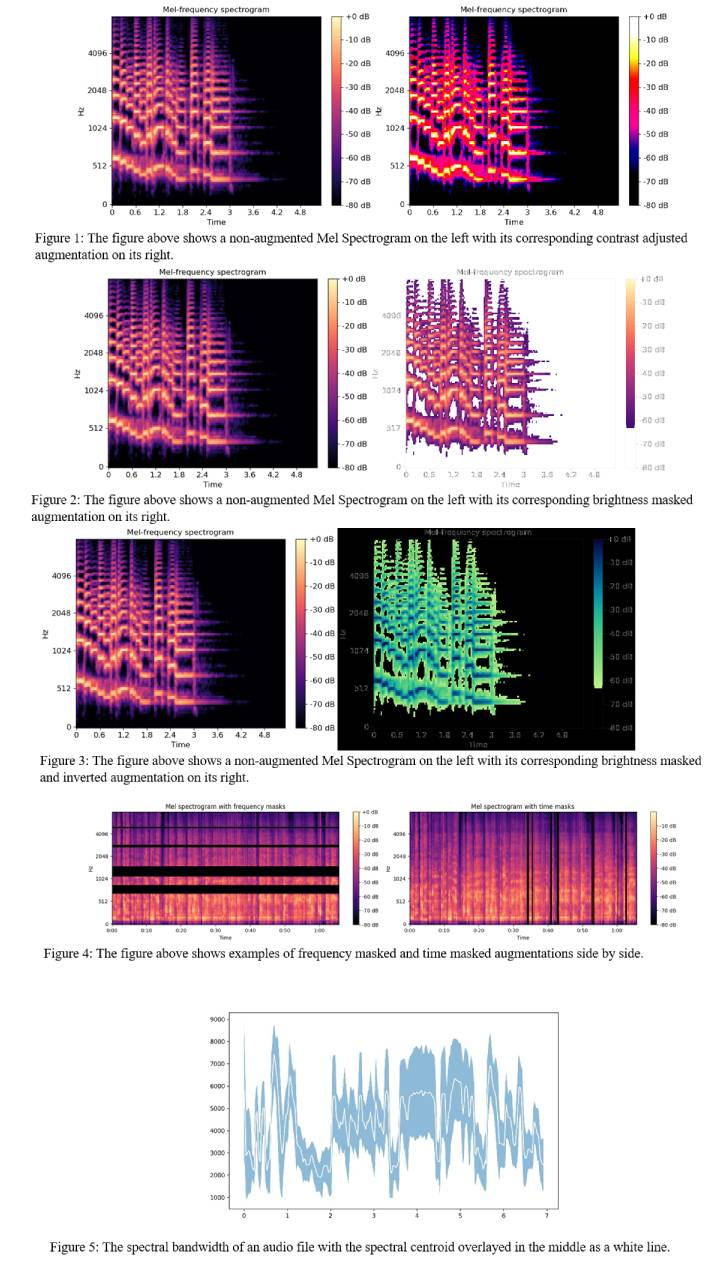

#**Loading audio and Generating Mel Spectrogram**


In [ ]:
#Playing Audio
import librosa
from IPython.display import Audio
from pydub import AudioSegment

# Load the audio in mp3 film format using librosa
audio = 'Tiger.mp3'
y, sr = librosa.load(audio)

# Audio Playback
Audio(data=y, rate=sr)

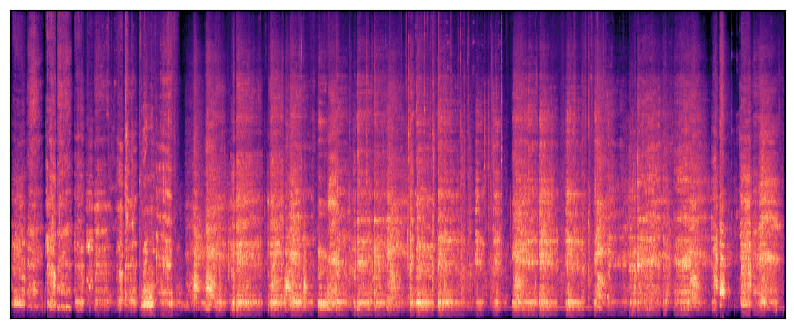

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Generate Mel Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

# Displaying the mel spectrogram without title, axis and colorbar
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max))
#plt.colorbar(format='%+2.0f dB')
#plt.title('Mel Spectrogram')
plt.savefig('noaugmentations.png')
plt.show()

#**Augmentation Demo**


**Dependencies**

> 1.   Librosa
> 2.   Pillow
> 3.   Audiomentations
> 4.   Tensorflow














### ***i.a) Image Augmentations - Gaudy Images (Mel Spectrogram)***

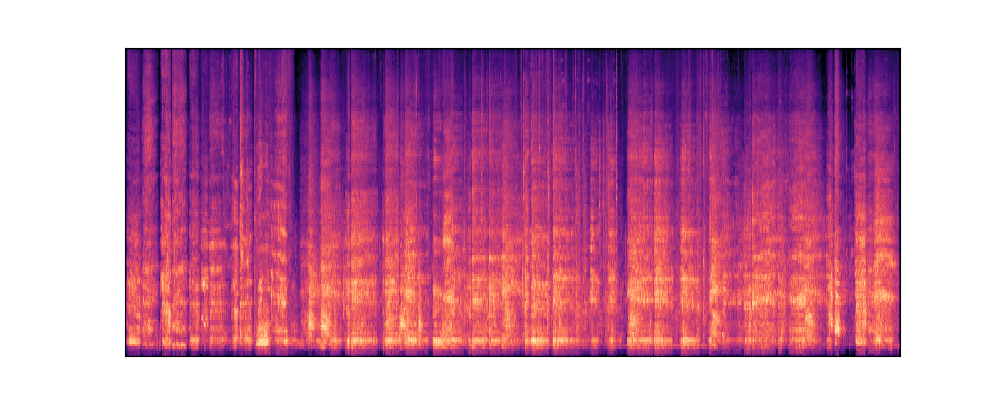

In [ ]:
from PIL import Image
from IPython.display import display

# Loading image from file
img = Image.open("/content/drive/MyDrive/Colab Notebooks/Project Echo/05 Capstone B/03 Benchmarking Augmentations/noaugmentations.png")

# Display image
display(img)

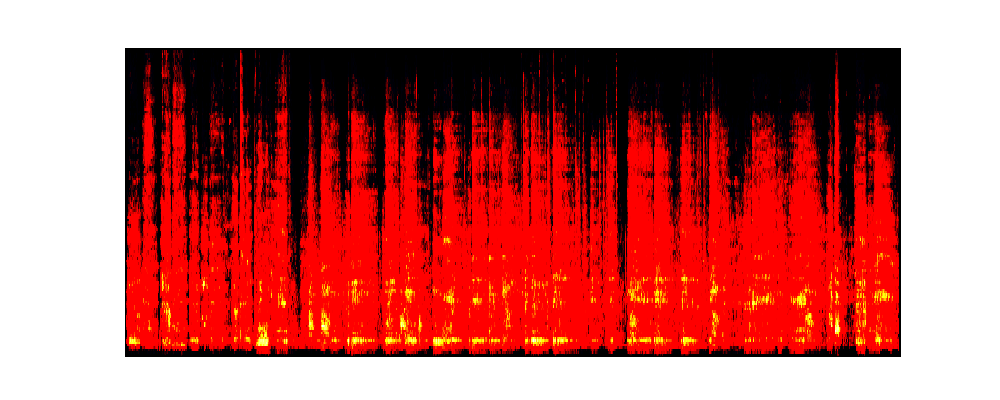

In [ ]:
#Making Gaudy by increasing contrast
from PIL import ImageEnhance

# Create a Contrast object
contrast = ImageEnhance.Contrast(img)

# Increase the contrast by a factor of 5
contrast_img = contrast.enhance(5)

# Show the contrast-adjusted image
display(contrast_img)

### ***i.b) Image Augmentations - Brightness Masking and Inversion (Mel Spectrogram)***

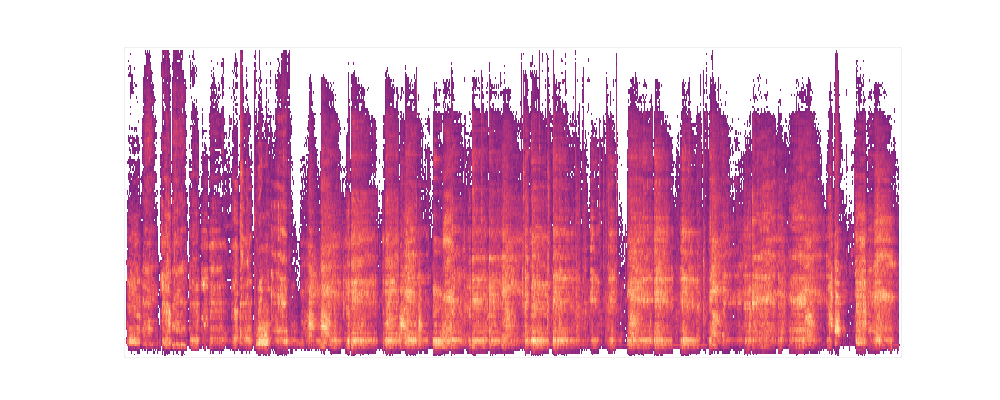

In [ ]:
#Selecting the brightest features of the image
from PIL import Image, ImageOps

# Convert to grayscale
gray_img = ImageOps.grayscale(img)

# Calculate brightness threshold (adjust as needed)
threshold = 70

# Create mask image with brightest pixels
mask_img = gray_img.point(lambda x: 255 if x > threshold else 0)

# Apply mask to original image
bright_mask_img = Image.composite(img, Image.new('RGB', img.size, (255, 255, 255)), mask_img)

# Display bright image
display(bright_mask_img)

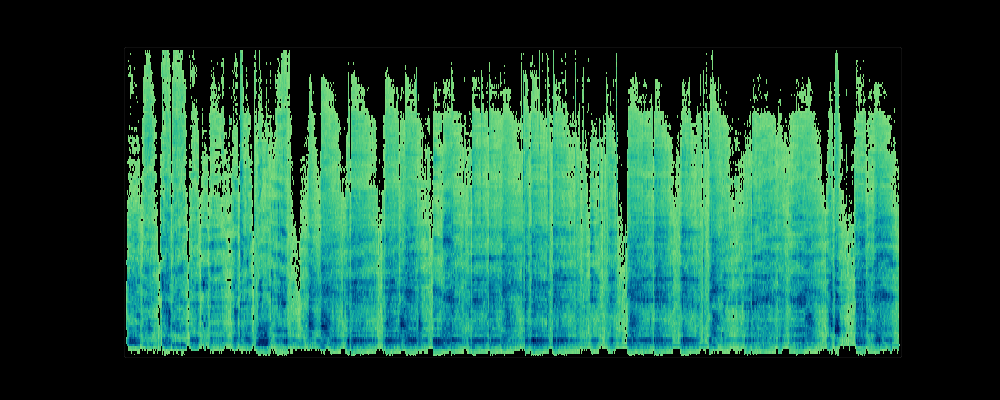

In [ ]:
#Brightness Mask Inversion

#To invert bright mask
bright_mask_img_inv  = ImageOps.invert(bright_mask_img )
display(bright_mask_img_inv)

### ***i.c) Image Augmentations - Frequency and Time Masking (Mel Spectrogram)***

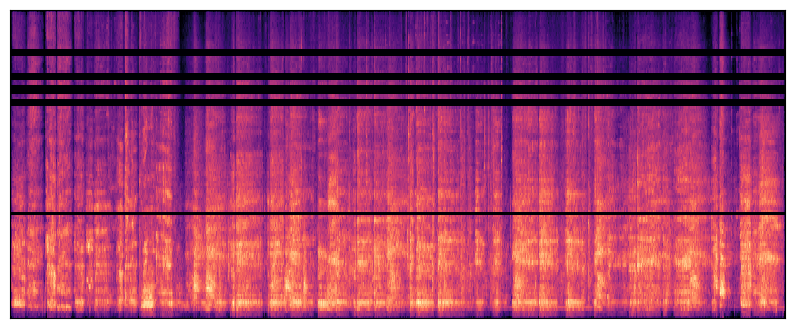

In [ ]:
#Frequency Masking

# Convert to dB
mel_spectrogram_dB = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Set the number of masks and the width of each mask
num_masks = 5
F = 5

# Apply the frequency masks
for i in range(num_masks):
    f = np.random.randint(low=0, high=F)
    start = np.random.randint(low=0, high=mel_spectrogram.shape[0]-f)
    mel_spectrogram_dB[start:start + f, :] = -80.0

# Display the masked spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_dB, sr=sr, fmax=8000)
#plt.colorbar(format='%+2.0f dB')
#plt.title('Mel spectrogram with frequency masks')
plt.show()


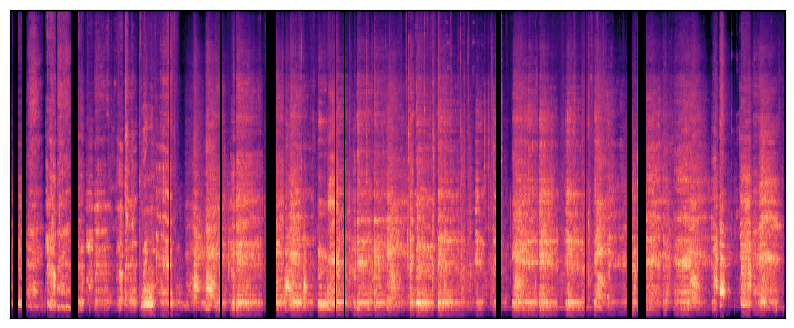

In [ ]:
#Time Masking

# Convert to dB
mel_spectrogram_dB2 = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Set the number of masks and the width of each mask
num_masks = 15
T = 30

# Apply the time masks
for i in range(num_masks):
    t = np.random.randint(low=0, high=T)
    start = np.random.randint(low=0, high=S.shape[1]-t)
    mel_spectrogram_dB2[:, start:start + t] = -80.0


# Display the masked spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_dB2, sr=sr, fmax=8000)
#plt.colorbar(format='%+2.0f dB')
#plt.title('Mel spectrogram with time masks')
plt.show()

### ***i.d) Image Augmentations - General Transformations (Mel Spectrogram)***

In [ ]:
#For tf.image module based transformations, the images are represented as a tensor of at least 3 dimensions.
import tensorflow as tf

#Contrast Adjusted Example; from tf's documentation
x = [[[1.0, 2.0, 3.0],
      [4.0, 5.0, 6.0]],
    [[7.0, 8.0, 9.0],
      [10.0, 11.0, 12.0]]]
x_adjusted = tf.image.adjust_contrast(x, 2.)

print(x_adjusted) #The contrast adjusted image is returned

tf.Tensor(
[[[-3.5 -2.5 -1.5]
  [ 2.5  3.5  4.5]]

 [[ 8.5  9.5 10.5]
  [14.5 15.5 16.5]]], shape=(2, 2, 3), dtype=float32)


### ***i.e) Image Augmentations - Other Image Augmentation Techniques (Mel Spectrogram)***

In [ ]:
#From, https://arxiv.org/pdf/2001.01401.pdf, axis warping (frequency and time warping).

### ***ii.a) Audio Augmentations -  General Augmentations (Mel Spectrogram)***

In [ ]:
import soundfile as sf
import audiomentations
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift

augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=1),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=1),
    PitchShift(min_semitones=-4, max_semitones=4, p=1),
    Shift(p=1),
])

augmented_samples = augment(samples=y, sample_rate=sr)

sf.write('augmented_audio.wav', augmented_samples, 48000, 'PCM_24')

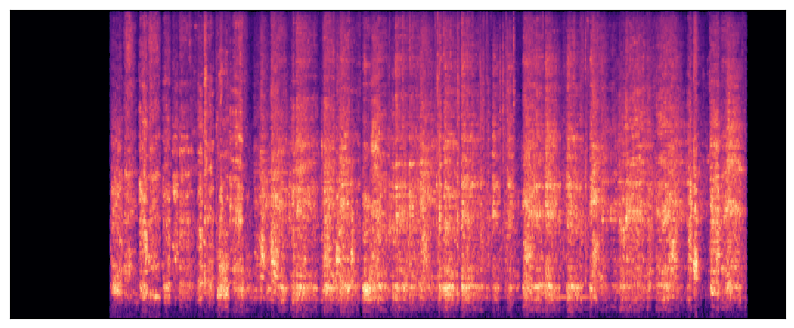

In [ ]:
#Generate Mel Spectrogram
# Load the augmented audio (replace 'augmented_audio.wav' with your file)
augmented_audio_file = 'augmented_audio.wav'
y_augmented, sr_augmented = librosa.load(augmented_audio_file)

# Generate the Mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y_augmented, sr=sr_augmented)

# Convert the power spectrogram to dB scale
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Display the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max))
#librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel')
#plt.colorbar(format='%+2.0f dB')
plt.savefig('augmented.png')
plt.show()

https://iver56.github.io/audiomentations/waveform_transforms/add_gaussian_noise/

### ***ii.b) Audio Augmentations - Frequency and Time Masking (Mel Spectrogram)***

https://iver56.github.io/audiomentations/waveform_transforms/time_mask/

### ***ii.c) Audio Augmentations - Spectral Bandwidth and Centroid (Log Power Spectrogram)***

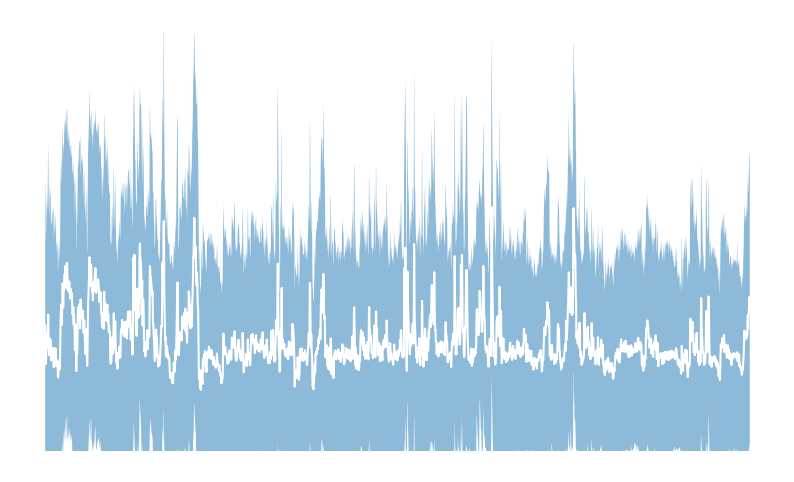

In [ ]:
# Computing the magnitude-spectrogram
S = np.abs(librosa.stft(y))

# Computeing the Spectral Centroid
centroid = librosa.feature.spectral_centroid(S=S)

# Computing the Spectral Bandwidth
spec_bw = librosa.feature.spectral_bandwidth(S=S)

# Create the plot for the Spectral Centroid and Bandwidth
plt.figure(figsize=(10, 6))

# Centroid and Bandwidth
times = librosa.times_like(spec_bw)
plt.fill_between(times, np.maximum(0, centroid[0] - spec_bw[0]),
                np.minimum(centroid[0] + spec_bw[0], sr/2),
                alpha=0.5)
plt.plot(times, centroid[0], label='Spectral centroid', color='w')
#plt.legend(loc='lower right')

# Remove the axis
plt.axis('off')

# Show the plot
plt.show()

#***Standardized Approaches (Pre-*evaluation*)***


This section describes standardized approaches for testing augmentations on the Engine Pipeline.


### ***i) Engine***



> The optimised_engine_pipeline_MASTER.ipynb file in GitHub/Project-Echo/src/Prototypes/engine will be the template utilised for all augmentation evaluations.

> For each evaluation, a separate version of the .ipynb file will be created so that the master remains untouched.

> The following naming convention will be adopted for each evaluation


---
Master/Template Pipeline:

**optimised_engine_pipeline_MASTER.ipynb**

Evaluation Pipeline Convention:

**optimised_engine_pipeline_[Initials]_[2/3 word short description of model changes]**

Eg:

**optimised_engine_pipeline_[BN]_[ImageAugmentations]**

### ***ii) Readme Documentation***



> On each pipeline evaluation, a brief description (3-4 sentences) of the changes made to the model and the sections to which the changes were made should also be included.

### ***iii) Data***



> The data used in the testing and evaluation will come from bucket 3 of the existing accumulated dataset.

> Bucket 3 (b3) of the dataset consists of 1580 files belonging to 15 classes.



#***Plan***


> To accurately assess the performance of each modified model, the unmodified model, (optimised_engine_pipeline_MASTER.ipynb file) needs to be run once.

> "The callbacks will ensure the best model weights (as defined by lowest validation loss) will be written to disk during training.  This is important as the model training could take several hours (12+ hours) to complete and any errors may cause the training loop to exit - so having the checkpoints acts as a backup." - Andrew Kudilczak  

> "The model will stop training when it sees no further improvement to the validation loss, after which it will restore the best weights found.  This allows the training to discover when it is overfit and stop further training.  This is why the number of epics is 10000.  It is expected the model training will end significantly earlier than this." - Andrew Kudilczak

> The unmodified model, (optimised_engine_pipeline_MASTER.ipynb file) would also need to be modified and have its augmentatoins removed and ran once to obtain a baseline.

> Upon which, each augmentation will be run as a single augmentation in a new modified pipeline model.

> Upon which, each augmentation will be run as a single augmentation in a new modified pipeline model (refer to the naming convention)

> Additionally for each augmentation parameters can be tuned and run again to determine which are the best parameters for that particular augmentation.

> And extra 1 more run for each tuned augmentation should be conducted and reported upon, this time with a probability being applied to each augmentation.

> Consequently, the pipeline can be adjusted to combine numerous augmentation techniques.

> To note: For each training of the pipeline, you will need to create a new disk cache to accurately measure and report the performance metrics for the modified model.

> To note: All augmentations should be trained on the same hardware device on the same settings under the same conditions. For evaluation, the specifications of the hardware should be reported.











#***Measuring Metrics (Post Training)***

This section describes a method to measure and document evaluation metrics for data augmentations post training.



### ***i) Metrics to Report***

The metrics to record include

*   Accuracy
*   Loss
*   Validation Accuracy
*   Validation Loss
*   Total Time of Training
*   Time per Epoch
*   Model Accuracy based on Predictions (Test Data Set)







### ***ii) Visualization***

> All the metrics in the "Metrics to Report" section should be visualised and reported in a graphical format and included in the model evaluation report for each set of augmentation evalution conducted.

> The Matplotlib library can be used for this visualization.

> The optimised_engine_pipeline also has built in Tensorboard functionality so, Tensorboard can be used for visualization







### ***iii) Saving the Model***

> We save a copy of the model because, model training takes a significant amount of time and allows for reproducibility.

> Saving the model also allows for making model predictions on new and unseen data as well as making it more efficient when fine tuning the model.


#**References**

https://pillowlab.princeton.edu/pubs/Cowley2020neurips_gaudy.pdf

https://arxiv.org/pdf/2001.01401.pdf

https://analyticsindiamag.com/a-tutorial-on-spectral-feature-extraction-for-audio-analytics/

https://iver56.github.io/audiomentations/spectrogram_transforms/

https://librosa.org/doc/main/generated/librosa.feature.spectral_bandwidth.html

https://librosa.org/doc/main/generated/librosa.feature.spectral_centroid.html
